In [9]:
import gymnasium
import highway_env
from matplotlib import pyplot as plt




In [10]:
env = gymnasium.make('highway-v0', render_mode='rgb_array')

In [11]:
from algorithms.Test import TestAgent

agent = TestAgent(env)

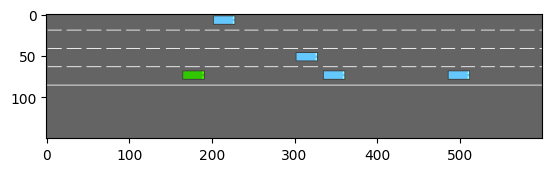

In [13]:
env.reset()
for _ in range(3):
    action = agent.policy(None)
    obs, reward, done, truncated, info = env.step(action)
    env.render()

plt.imshow(env.render())
plt.show()
